<a href="https://colab.research.google.com/github/prajithkukkadapu/prajithkukkadapu/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING MODULES**

In [ ]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')


from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px

sns.set(style="darkgrid")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


**IMPOTING DATASET**


In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/gabrielpreda/covid-19-tweets/master/covid19_tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


let's check shape of dataframe



In [ ]:
df.shape

(179108, 13)

get the required coloumns

In [ ]:
needed_coloumns=['user_name','date','text']
df=df[needed_coloumns]
df.head()

,user_name,date,text
0,ᏉᎥ☻լꂅϮ,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...


change types of some coloumns

In [ ]:
df.user_name= df.user_name.astype('category')
df.user_name=df.user_name.cat.codes
df.date= pd.to_datetime(df.date).dt.date
df.head()

,user_name,date,text
0,89755,2020-07-25,If I smelled the scent of hand sanitizers toda...
1,76403,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,76147,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,84572,2020-07-25,@brookbanktv The one gift #COVID19 has give me...
4,18398,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...


picking out tweet texts

In [ ]:
texts=df['text']
texts

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

Removing URL'S

In [ ]:
remove_url=lambda x : re.sub(r'https/S+','',str(x))
texts_lr=texts.apply(remove_url)
texts_lr

0         If I smelled the scent of hand sanitizers toda...
1         Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2         @diane3443 @wdunlap @realDonaldTrump Trump nev...
3         @brookbanktv The one gift #COVID19 has give me...
4         25 July : Media Bulletin on Novel #CoronaVirus...
                                ...                        
179103    Thanks @IamOhmai for nominating me for the @WH...
179104    2020! The year of insanity! Lol! #COVID19 http...
179105    @CTVNews A powerful painting by Juan Lucena. I...
179106    More than 1,200 students test positive for #CO...
179107    I stop when I see a Stop\n\n@SABCNews\n@Izinda...
Name: text, Length: 179108, dtype: object

Converting all tweets to lower case

In [ ]:
to_lower = lambda x: x.lower()
texts_lr_lc=texts_lr.apply(to_lower)
texts_lr_lc


0         if i smelled the scent of hand sanitizers toda...
1         hey @yankees @yankeespr and @mlb - wouldn't it...
2         @diane3443 @wdunlap @realdonaldtrump trump nev...
3         @brookbanktv the one gift #covid19 has give me...
4         25 july : media bulletin on novel #coronavirus...
                                ...                        
179103    thanks @iamohmai for nominating me for the @wh...
179104    2020! the year of insanity! lol! #covid19 http...
179105    @ctvnews a powerful painting by juan lucena. i...
179106    more than 1,200 students test positive for #co...
179107    i stop when i see a stop\n\n@sabcnews\n@izinda...
Name: text, Length: 179108, dtype: object

removing punctuations

In [ ]:
remove_punctuations= lambda x: x.translate(str.maketrans('','',string.punctuation))
texts_lr_lc_np=texts_lr_lc.apply(remove_punctuations)
texts_lr_lc_np

0         if i smelled the scent of hand sanitizers toda...
1         hey yankees yankeespr and mlb  wouldnt it have...
2         diane3443 wdunlap realdonaldtrump trump never ...
3         brookbanktv the one gift covid19 has give me i...
4         25 july  media bulletin on novel coronavirusup...
                                ...                        
179103    thanks iamohmai for nominating me for the who ...
179104    2020 the year of insanity lol covid19 httpstco...
179105    ctvnews a powerful painting by juan lucena its...
179106    more than 1200 students test positive for covi...
179107    i stop when i see a stop\n\nsabcnews\nizindaba...
Name: text, Length: 179108, dtype: object

removing stopwords

In [ ]:
import gensim
from gensim.parsing.preprocessing import remove_stopwords
more_words=['covid','#coronavirus', '#coronavirusoutbreak', '#coronavirusPandemic', '#covid19', '#covid_19', '#epitwitter', '#ihavecorona', 'amp', 'coronavirus', 'covid19']
stop_words=set(gensim.parsing.preprocessing.STOPWORDS)
stop_words.update(more_words)
remove_words=lambda x:' '.join([word for word in x.split() if word not in stop_words])
texts_lr_lc_np_ns=texts_lr_lc_np.apply(remove_words)
texts_lr_lc_np_ns



0         smelled scent hand sanitizers today past think...
1         hey yankees yankeespr mlb wouldnt sense player...
2         diane3443 wdunlap realdonaldtrump trump claime...
3         brookbanktv gift appreciation simple things me...
4         25 july media bulletin novel coronavirusupdate...
                                ...                        
179103    thanks iamohmai nominating wearamask challenge...
179104            2020 year insanity lol httpstcoy48np0yzgn
179105    ctvnews powerful painting juan lucena tribute ...
179106    1200 students test positive major university a...
179107    stop stop sabcnews izindabanews24 dailysunsa e...
Name: text, Length: 179108, dtype: object

**let's create a big list of words out of all tweets **

In [ ]:
words_list=[word for line in texts_lr_lc_np_ns for word in line.split()]
words_list[:5]


['smelled', 'scent', 'hand', 'sanitizers', 'today']

In [25]:
word_count=Counter(words_list).most_common(50)
word_count_df=pd.DataFrame(word_count)
word_count_df.columns=['word','freq']
px.bar(word_count_df,x='word',y='freq',title='Most Common words')


putting cleaned text in the main dataframe

In [26]:
df.text=texts_lr_lc_np_ns
df.head()

,user_name,date,text
0,89755,2020-07-25,smelled scent hand sanitizers today past think...
1,76403,2020-07-25,hey yankees yankeespr mlb wouldnt sense player...
2,76147,2020-07-25,diane3443 wdunlap realdonaldtrump trump claime...
3,84572,2020-07-25,brookbanktv gift appreciation simple things me...
4,18398,2020-07-25,25 july media bulletin novel coronavirusupdate...


**SENTIMENT ANALYSIS **


Getting the polarity scores for each tweet
---



In [27]:
sid=SentimentIntensityAnalyzer()
ps= lambda x: sid.polarity_scores(x)
sentiment_scores=df.text.apply(ps)
sentiment_scores

0         {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...
1         {'neg': 0.0, 'neu': 0.715, 'pos': 0.285, 'comp...
2         {'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp...
3         {'neg': 0.0, 'neu': 0.446, 'pos': 0.554, 'comp...
4         {'neg': 0.0, 'neu': 0.813, 'pos': 0.187, 'comp...
                                ...                        
179103    {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...
179104    {'neg': 0.389, 'neu': 0.316, 'pos': 0.295, 'co...
179105    {'neg': 0.234, 'neu': 0.584, 'pos': 0.182, 'co...
179106    {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...
179107    {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'comp...
Name: text, Length: 179108, dtype: object

In [28]:
sentiment_df=pd.DataFrame(data=list(sentiment_scores))
sentiment_df.head()

,neg,neu,pos,compound
0,0.000,0.738,0.262,0.4939
1,0.000,0.715,0.285,0.3810
2,0.189,0.811,0.000,-0.2732
3,0.000,0.446,0.554,0.7351
4,0.000,0.813,0.187,0.3182


Labelling the scores based on the compound polarity values 

In [29]:
labelize= lambda x: 'neutral' if x==0 else('positive' if x>0 else 'negative')
sentiment_df['label']=sentiment_df.compound.apply(labelize)
sentiment_df.head()

,neg,neu,pos,compound,label
0,0.000,0.738,0.262,0.4939,positive
1,0.000,0.715,0.285,0.3810,positive
2,0.189,0.811,0.000,-0.2732,negative
3,0.000,0.446,0.554,0.7351,positive
4,0.000,0.813,0.187,0.3182,positive


joining the above data frame with initial dataframe

In [30]:
data=df.join(sentiment_df.label)
data.head()

,user_name,date,text,label
0,89755,2020-07-25,smelled scent hand sanitizers today past think...,positive
1,76403,2020-07-25,hey yankees yankeespr mlb wouldnt sense player...,positive
2,76147,2020-07-25,diane3443 wdunlap realdonaldtrump trump claime...,negative
3,84572,2020-07-25,brookbanktv gift appreciation simple things me...,positive
4,18398,2020-07-25,25 july media bulletin novel coronavirusupdate...,positive


plotting sentiment scores 

In [31]:
counts_df=data.label.value_counts().reset_index()
counts_df

,index,label
0,positive,68148
1,neutral,64514
2,negative,46446


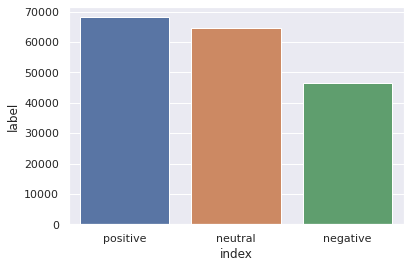

In [32]:
sns.barplot(x='index',y='label',data=counts_df)

In [37]:
data_agg=data[['user_name','date','label']].groupby(['date','label']).count().reset_index()
data_agg.columns=['date','label','counts']
data_agg.head()

,date,label,counts
0,2020-07-24,negative,85
1,2020-07-24,neutral,95
2,2020-07-24,positive,115
3,2020-07-25,negative,4314
4,2020-07-25,neutral,5988


In [38]:
px.line(data_agg, x='date', y='counts', color='label', title='Sentiment analysis on tweets regarding covid 19')